In [2]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/birthweight_low.xlsx'


# reading the file into Python
bw = pd.read_excel(file)


# outputting the first ten rows of the dataset
bw.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [3]:
bw.info() #looking the data types of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
mage      196 non-null int64
meduc     193 non-null float64
monpre    196 non-null int64
npvis     193 non-null float64
fage      196 non-null int64
feduc     189 non-null float64
omaps     196 non-null int64
fmaps     196 non-null int64
cigs      196 non-null int64
drink     196 non-null int64
male      196 non-null int64
mwhte     196 non-null int64
mblck     196 non-null int64
moth      196 non-null int64
fwhte     196 non-null int64
fblck     196 non-null int64
foth      196 non-null int64
bwght     196 non-null int64
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [4]:
bw.shape  #dimensions of the dataset

(196, 18)

In [5]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {bw.shape[0]}
Features:     {bw.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [6]:
bw.isnull().sum()   # checking whether there is missing values in out features or not

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [7]:
for columns in bw:
    print(columns)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [8]:
# loop to search for missing values and validating that missing values were identified

for col in bw:
    count_values_columns = bw[col].value_counts(normalize = False,
                                    sort      = False,
                                    ascending = False).sort_index()
    print(count_values_columns)
    print('-'*90)

23     2
24     3
25     2
26     2
27     2
28     4
29    10
30     8
31     6
32     8
33    12
34     9
35     5
36     5
37     7
38    12
39     7
40     9
41     8
42    14
43     5
44     5
45     1
46     2
47     6
48     7
49     4
50     4
51     4
52     2
53     2
54     1
56     1
57     1
58     2
59     1
60     1
61     3
62     1
64     2
67     1
68     1
69     1
70     1
71     2
Name: mage, dtype: int64
------------------------------------------------------------------------------------------
8.0      1
10.0     4
11.0    11
12.0    56
13.0    15
14.0    28
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64
------------------------------------------------------------------------------------------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64
------------------------------------------------------------------------------------------
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0

In [9]:
# flag the missing values
for column in bw:

    if bw[column].isnull().astype(int).sum() > 0:
        bw['m_' + column] = bw[column].isnull().astype(int)

In [11]:
# sum of missing values
print(f"""
Sums of Missing Value Flags
--------------------------
{bw.iloc[ : , -3: ].sum(axis = 0)}

""")


Sums of Missing Value Flags
--------------------------
m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64




In [10]:
bw.describe(include = "number")   #Descriptive analysis of our data

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,0.015306,0.015306,0.035714
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,0.123082,0.123082,0.186052
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,0.000000,0.000000,0.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,0.000000,0.000000,0.000000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,0.000000,0.000000,0.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,0.000000,0.000000,0.000000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,1.000000,1.000000,1.000000


In [11]:
# Dropping the missing values and creating a new DataFrame
bw_dropped = pd.DataFrame.copy(bw)

bw_dropped = bw_dropped.dropna()

In [12]:
# missing values for mother education
m_meduc = bw['meduc'].median()

# fill NA with mode
bw['meduc'].fillna(value = int(m_meduc), #value for filling the NA
                            inplace = True) #replacing the Na

In [13]:
# subsetting original missing values for cut
(bw.loc[ : , ['m_meduc', 'meduc']][  bw.loc[ : , 'm_meduc'] == 1  ])

,m_meduc,meduc
0,1,14.0
111,1,14.0
114,1,14.0


In [14]:
bw['meduc'].head

<bound method NDFrame.head of 0      14.0
1      12.0
2      12.0
3      16.0
4      12.0
5      11.0
6      12.0
7      14.0
8      12.0
9      12.0
10     11.0
11     16.0
12     12.0
13     12.0
14     16.0
15     17.0
16     12.0
17     16.0
18     14.0
19     13.0
20     17.0
21     14.0
22     16.0
23     12.0
24     16.0
25     14.0
26     16.0
27     13.0
28     13.0
29     16.0
30     16.0
31     11.0
32     12.0
33     14.0
34     12.0
35     12.0
36     12.0
37     14.0
38     12.0
39     12.0
40     16.0
41     16.0
42     16.0
43     11.0
44     10.0
45     12.0
46     13.0
47     12.0
48     12.0
49     14.0
50     12.0
51     14.0
52     14.0
53     16.0
54     17.0
55     17.0
56     12.0
57     11.0
58     14.0
59     17.0
60     14.0
61     12.0
62     16.0
63     14.0
64     16.0
65     11.0
66     16.0
67     14.0
68     16.0
69     15.0
70     16.0
71     16.0
72     12.0
73     15.0
74     13.0
75     16.0
76     16.0
77     12.0
78     17.0
79     17.0
80     16.

In [15]:
# missing values for total number of prenatal visits
m_npvis = bw['npvis'].median()

# fill NA with mode
bw['npvis'].fillna(value = int(m_npvis), #value for filling the NA
                                   inplace = True) #replacing the Na

In [16]:
# missing values for father education
m_feduc = bw['feduc'].median()
# fill NA with mode
bw['feduc'].fillna(value = int(m_feduc), #value for filling the NA
                                   inplace = True) #replacing the Na

In [17]:
# validation to make sure that we don't have missing values in our imputed data
print(bw.isnull().sum())

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64


In [18]:
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
mage       196 non-null int64
meduc      196 non-null float64
monpre     196 non-null int64
npvis      196 non-null float64
fage       196 non-null int64
feduc      196 non-null float64
omaps      196 non-null int64
fmaps      196 non-null int64
cigs       196 non-null int64
drink      196 non-null int64
male       196 non-null int64
mwhte      196 non-null int64
mblck      196 non-null int64
moth       196 non-null int64
fwhte      196 non-null int64
fblck      196 non-null int64
foth       196 non-null int64
bwght      196 non-null int64
m_meduc    196 non-null int32
m_npvis    196 non-null int32
m_feduc    196 non-null int32
dtypes: float64(3), int32(3), int64(15)
memory usage: 30.0 KB


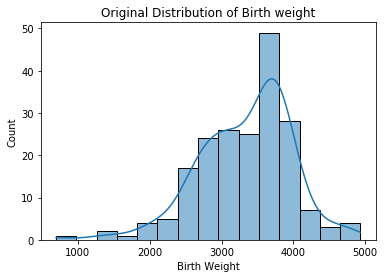

In [19]:
sns.histplot(data  = bw,
         x     = "bwght",
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [20]:
bw_corr = bw.corr(method = 'pearson').round(decimals = 2)
bw_corr

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
mage,1.00,-0.09,0.16,-0.05,0.58,-0.09,-0.21,-0.24,0.17,0.34,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.46,0.12,0.01,0.07
meduc,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.25,0.14,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,0.09,0.01,-0.02,-0.05
monpre,0.16,-0.23,1.00,-0.34,0.04,-0.29,-0.17,-0.08,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.05,-0.00,-0.06,0.38
npvis,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.09,0.09,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03,0.06,-0.12,0.01,-0.18
fage,0.58,-0.07,0.04,-0.06,1.00,-0.01,-0.16,-0.20,0.17,0.29,-0.09,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.40,0.07,-0.06,-0.01
feduc,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.33,0.13,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.13,0.06,0.10,0.01
omaps,-0.21,0.25,-0.17,0.09,-0.16,0.33,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25,-0.15,0.01,-0.16
fmaps,-0.24,0.14,-0.08,0.09,-0.20,0.13,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25,-0.12,0.01,-0.16
cigs,0.17,0.10,-0.06,0.04,0.17,0.05,-0.15,-0.09,1.00,0.36,-0.12,0.03,-0.20,0.17,-0.01,-0.19,0.21,-0.57,0.04,0.07,-0.03
drink,0.34,-0.07,0.02,-0.07,0.29,-0.12,-0.18,-0.16,0.36,1.00,-0.09,0.16,-0.11,-0.04,0.07,-0.10,0.02,-0.74,0.11,-0.03,-0.06


#If we can see the table above, cigs and drink are able to explain our dependent variable

In [21]:
bw.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,0.02,0.02,0.04
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.12,0.12,0.19
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,0.00,0.00,0.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,0.00,0.00,0.00
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,0.00,0.00,0.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,0.00,0.00,0.00
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,1.00,1.00,1.00


In [22]:
# Grouping the mage and fage
# variable mother age
bw ['Cat_mage'] = 0

# for loop with iterrows()
for index, col in bw.iterrows():
    
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if bw.loc[index, 'mage'] < 30:
        bw.loc[index, 'Cat_mage'] = '30'
        
        
    elif bw.loc[index, 'mage'] < 40:
        bw.loc[index, 'Cat_mage'] = '40'
        
        
    elif bw.loc[index, 'mage'] < 50:
        bw.loc[index, 'Cat_mage'] = '50'
        
        
    elif bw.loc[index, 'mage'] <= 80:
        bw.loc[index, 'Cat_mage'] = '80'
    
    
    # safety net
    else:
        bw.loc[index, 'Cat_mage'] = 'Age not defined'

# variable father age
bw ['Cat_fage'] = 0

# for loop with iterrows()
for index, col in bw.iterrows():
    
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if bw.loc[index, 'fage'] < 30:
        bw.loc[index, 'Cat_fage'] = '30'
        
        
    elif bw.loc[index, 'fage'] < 40:
        bw.loc[index, 'Cat_fage'] = '40'
        
        
    elif bw.loc[index, 'fage'] < 50:
        bw.loc[index, 'Cat_fage'] = '50'
        
        
    elif bw.loc[index, 'fage'] <= 80:
        bw.loc[index, 'Cat_fage'] = '80'
    
    # safety net
    else:
        bw.loc[index, 'Cat_fage'] = 'Age not defined'
        
# variable cig
bw['_cig'] = 0       
 # for loop with iterrows()
for index, col in bw.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if bw.loc[index, 'cigs'] ==0:
        bw.loc[index, '_cigs'] = '0'
    else :
        bw.loc[index, '_cigs'] = '1'
    
# variable drink_bins
bw['_drink'] = 0       
# for loop with iterrows()
for index, col in bw.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if bw.loc[index, 'drink'] ==0:
        bw.loc[index, '_drink'] = '0'
    else :
        bw.loc[index, '_drink'] = '1'

In [23]:
# printing the value counts for each category
print(bw['Cat_fage'].value_counts())
print('-'*70)
print(bw['Cat_mage'].value_counts())
print('-'*70)
print(bw['_cig'].value_counts())
print('-'*70)
print(bw['_drink'].value_counts())
print('-'*70)

40    107
50     47
80     21
30     21
Name: Cat_fage, dtype: int64
----------------------------------------------------------------------
40    79
50    61
80    31
30    25
Name: Cat_mage, dtype: int64
----------------------------------------------------------------------
0    196
Name: _cig, dtype: int64
----------------------------------------------------------------------
1    185
0     11
Name: _drink, dtype: int64
----------------------------------------------------------------------


In [24]:
bw = pd.get_dummies(data = bw, columns = ['Cat_mage', 'Cat_fage', '_cig', '_drink'], dtype = int)

In [30]:
# log transforming Birth weight and saving it to the dataset
bw['log_bwght'] = np.log(bw['bwght'])

In [31]:
bw['mage2'] = bw['mage'] * bw['mage']
bw['mage_fage'] = bw['mage'] * bw['fage']
bw['both_educ'] = bw['meduc']+ bw['feduc']
bw['npvis_monpre'] = bw['npvis'] * bw['monpre']
bw['drink_cig'] = bw['drink']*bw['cigs']
bw['mage_drink'] = bw['drink'] * bw['mage']
bw['log_mage_drink'] = np.log(bw['mage_drink'])
bw['npvis2'] = bw['npvis'] * bw['npvis']
bw['drink_cig_fage'] = bw['drink'] * bw['cigs'] * bw['fage']

In [32]:
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 43 columns):
mage              196 non-null int64
meduc             196 non-null float64
monpre            196 non-null int64
npvis             196 non-null float64
fage              196 non-null int64
feduc             196 non-null float64
omaps             196 non-null int64
fmaps             196 non-null int64
cigs              196 non-null int64
drink             196 non-null int64
male              196 non-null int64
mwhte             196 non-null int64
mblck             196 non-null int64
moth              196 non-null int64
fwhte             196 non-null int64
fblck             196 non-null int64
foth              196 non-null int64
bwght             196 non-null int64
m_meduc           196 non-null int32
m_npvis           196 non-null int32
m_feduc           196 non-null int32
_cigs             196 non-null object
Cat_mage_30       196 non-null int32
Cat_mage_40       196 non-null int32


In [33]:
bw.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,_cigs,Cat_mage_30,Cat_mage_40,Cat_mage_50,Cat_mage_80,Cat_fage_30,Cat_fage_40,Cat_fage_50,Cat_fage_80,_cig_0,_drink_0,_drink_1,mage2,mage_fage,both_educ,npvis_monpre,drink_cig,mage_drink,log_mage_drink,npvis2,drink_cig_fage,log_bwght
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,1,0,0,0,1,0,0,0,1,1,0,1,4761,4278,28.0,10.0,207,621,6.431331,4.0,12834,6.546785
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,4624,4148,23.0,30.0,275,748,6.617403,100.0,16775,7.162397
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,5041,3266,24.0,18.0,252,852,6.747587,36.0,11592,7.306531
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,3481,2832,32.0,8.0,210,590,6.380123,64.0,10080,7.450080
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,2304,1872,24.0,24.0,221,624,6.436150,36.0,8619,7.578657


In [34]:
for column in bw:
    print(f"{column} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
m_meduc +
m_npvis +
m_feduc +
_cigs +
Cat_mage_30 +
Cat_mage_40 +
Cat_mage_50 +
Cat_mage_80 +
Cat_fage_30 +
Cat_fage_40 +
Cat_fage_50 +
Cat_fage_80 +
_cig_0 +
_drink_0 +
_drink_1 +
mage2 +
mage_fage +
both_educ +
npvis_monpre +
drink_cig +
mage_drink +
log_mage_drink +
npvis2 +
drink_cig_fage +
log_bwght +


In [35]:
# declaring set of x-variables
x_variables = ['cigs', 'drink', 'Cat_mage_40', 'Cat_mage_50', 'Cat_fage_30', 'Cat_fage_40', 
               'Cat_fage_50']

# looping to make x-variables suitable for statsmodels
for column in x_variables:
    print(f'{column} +')

cigs +
drink +
Cat_mage_40 +
Cat_mage_50 +
Cat_fage_30 +
Cat_fage_40 +
Cat_fage_50 +


In [36]:
# declaring set of x-variables
x_variables1 = ['cigs', 'drink', 'Cat_mage_40', 'Cat_mage_50','Cat_fage_50', 'drink_cig']

# looping to make x-variables suitable for statsmodels
for column in x_variables:
    print(f'{column}, +')

cigs, +
drink, +
Cat_mage_40, +
Cat_mage_50, +
Cat_fage_30, +
Cat_fage_40, +
Cat_fage_50, +


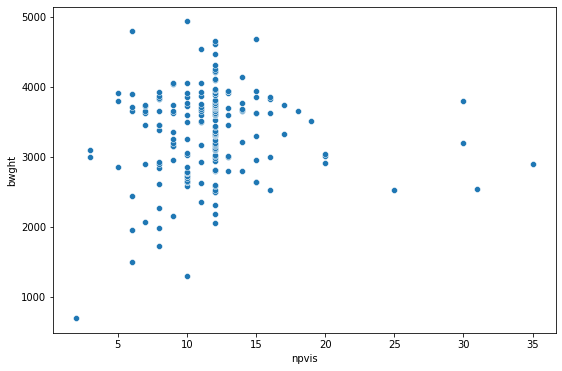

In [37]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "npvis",
                y    = "bwght",
                data = bw)


# SHOWing the results
plt.show()

In [38]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

In [39]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ cigs +
drink +
Cat_mage_40 +
Cat_mage_50 +
Cat_fage_30 +
Cat_fage_40 +
Cat_fage_50""",
                                       data = bw)

# Step 2: FIT the data into the model object
results = lm_best.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     68.04
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.52e-48
Time:                        22:19:52   Log-Likelihood:                -1422.4
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     188   BIC:                             2887.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3971.0847    109.370     36.309      

In [40]:
# preparing explanatory variable data
bw_data = bw.drop(["bwght",
                               "log_bwght",],
                               axis = 1)


# preparing response variables
bw_target = bw.loc[ : , "bwght"]
log_bw_target = bw.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            bw_data,
            bw_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 41)
y-side: (147,)


Testing Data
------------
X-side: (49, 41)
y-side: (49,)



In [41]:
# merging X_train and y_train so that they can be used in statsmodels
bw_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ cigs +
                                       drink +
                                       Cat_fage_30 +
                                       Cat_fage_40 +
                                       Cat_fage_50
                                       """,
                                       data = bw)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.50e-49
Time:                        22:19:57   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2863.
Df Residuals:                     190   BIC:                             2882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4019.1763    108.563     37.022      

In [42]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = bw.loc[:, x_variables]


# preparing response variable
bw_target = bw.loc[:, 'bwght']

# preparing x-variables from the OLS model
ols_data1 = bw.loc[:, x_variables1]


# preparing response variable
bw_target1 = bw.loc[:, 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_OLS1, x_test_OLS1, y_train_OLS1, y_test_OLS1 = train_test_split(
            ols_data1,     # x-variables
            bw_target1,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


OLS Regression Model

In [43]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7196
OLS Testing Score  : 0.6797
OLS Train-Test Gap : 0.0399


In [44]:
# zipping each feature name to its coefficient
lr_model_values = zip(bw_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3875.19)
('cigs', -38.89)
('drink', -112.57)
('Cat_mage_40', 213.4)
('Cat_mage_50', 232.13)
('Cat_fage_30', 290.18)
('Cat_fage_40', 447.34)
('Cat_fage_50', 271.41)


In [45]:
import sklearn.linear_model # linear models

LASSO MODEL

In [46]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7137
Lasso Testing Score  : 0.7061
Lasso Train-Test Gap : 0.0076


In [47]:
# zipping each feature name to its coefficient
lasso_model_values = zip(bw_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4024.51)
('mage', -37.58)
('meduc', -114.39)
('monpre', 203.13)
('npvis', 209.31)
('fage', 115.84)
('feduc', 293.28)
('omaps', 110.79)


In [48]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4024.51)
('mage', -37.58)
('meduc', -114.39)
('monpre', 203.13)
('npvis', 209.31)
('fage', 115.84)
('feduc', 293.28)
('omaps', 110.79)


ARD MODEL

In [49]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7085
Testing Score : 0.6908
ARD Train-Test Gap : 0.0177


In [50]:
# zipping each feature name to its coefficient
ard_model_values = zip(bw_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4103.25)
('mage', -38.63198)
('meduc', -118.11067)
('monpre', 249.27654)
('npvis', 259.68317)
('fage', 0.00132)
('feduc', 211.31192)
('omaps', 7.59724)


In [51]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4103.25)
('mage', -38.63198)
('meduc', -118.11067)
('monpre', 249.27654)
('npvis', 259.68317)
('fage', 0.00132)
('feduc', 211.31192)
('omaps', 7.59724)


In [52]:
# comparing results
x1 = abs(lr_train_score - lr_test_score).round(2)
y1 = abs(lasso_train_score - lasso_test_score).round(2)
z1 = abs(ard_train_score - ard_test_score).round(2)
print(f"""
Model      Train Score      Test Score     Gap Score
-----      -----------      ----------     ----------
OLS        {lr_train_score}           {lr_test_score}         {x1}
->Lasso<-  {lasso_train_score}           {lasso_test_score}         {y1} --> Selected_Model
ARD        {ard_train_score}           {ard_test_score}         {z1}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score     Gap Score
-----      -----------      ----------     ----------
OLS        0.7196           0.6797         0.04
->Lasso<-  0.7137           0.7061         0.01 --> Selected_Model
ARD        0.7085           0.6908         0.02

